## 1. 사이클로이드 매개변수 방정식을 그래프를 이용해 눈으로 확인해보자.
## $x=a(\theta-sin\theta)$
## $y=a(1-cos\theta)$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as scop
import math
from scipy.optimize import newton
from scipy.integrate import quad

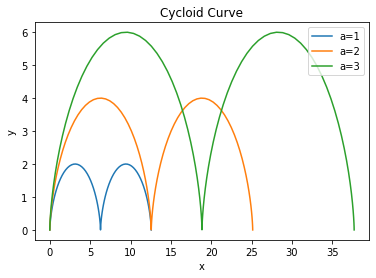

In [2]:
radius= np.array([1,2,3])
theta = np.linspace(0,4*np.pi,100)

for a in radius:
    x=a*(theta-np.sin(theta))
    y=a*(1-np.cos(theta))
    
    plt.title('Cycloid Curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,y,label='a='+str(a))
    plt.legend(loc='upper right')
    

## (3) In conclusion
사이클로이드 매개변수 방정식을 파이썬 그래프 툴로 확인하였습니다.

그리고, 사이클로이드 곡선의 형태는 a의 크기에 따라 사이즈는 달라지지만, 모양과 형태는 유지된다는 결론을 얻을 수 있습니다.

## 2. 사이클로이드 곡선과 직선 그리고 원 곡선에 대해서 걸리는 시간을 비교해보자.

In [3]:
g = 9.81
x2, y2 = 1, 0.65
def cycloid(x2, y2, N=100):

    # 뉴턴 방법 참조
    def f(theta):
        return y2/x2 - (1-np.cos(theta))/(theta-np.sin(theta))
    theta2 = newton(f, np.pi/2)

    # R의 반지름을 가진 원이 사이클로이드 곡선을 생성한다.
    R = y2 / (1 - np.cos(theta2))

    theta = np.linspace(0, theta2, N)
    x = R * (theta - np.sin(theta))
    y = R * (1 - np.cos(theta))

    # The time of travel
    T = theta2 * np.sqrt(R / g)
    print('T(cycloid) = {:.3f}'.format(T))
    return x, y, T

In [4]:
def linear(x2, y2, N=100):
    
    m = y2 / x2
    x = np.linspace(0, x2, N)
    y = m*x

    # The time of travel
    T = np.sqrt(2*(1+m**2)/g/m * x2)
    print('T(linear) = {:.3f}'.format(T))
    return x, y, T
def func(x, f, fp):

    return np.sqrt((1+fp(x)**2) / (2 * g * f(x)))

def circle(x2, y2, N=100):
    
    # Circle radius
    r = (x2**2 + y2**2)/2/x2

    def f(x):
        return np.sqrt(2*r*x - x**2)
    def fp(x):
        return (r-x)/f(x)

    x = np.linspace(0, x2, N)
    y = f(x)

    #적분으로 구한다.
    T = quad(func, 0, x2, args=(f, fp))[0]
    print('T(circle) = {:.3f}'.format(T))
    return x, y, T


T(cycloid) = 0.566
T(circle) = 0.580
T(linear) = 0.668


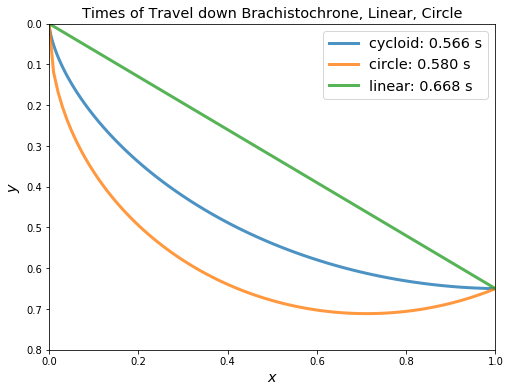

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
for curve in ('cycloid', 'circle',  'linear'):
    x, y, T = globals()[curve](x2, y2)
    ax.plot(x, y, lw=3, alpha=0.8, label='{}: {:.3f} s'.format(curve, T))
ax.legend(fontsize='x-large')

ax.set_title("Times of Travel down Brachistochrone, Linear, Circle", fontsize='x-large')
ax.set_xlabel('$x$', fontsize='x-large')
ax.set_ylabel('$y$',fontsize='x-large')
ax.set_xlim(0, 1)
ax.set_ylim(0.8, 0)
plt.show()

## (1)In conclusion

사이클로이드 곡선은 최속강하선이다.